In [1]:
using JLD
using PyPlot
using StatsBase
using Distributions
using VBMatrixFactorization

In [54]:
include("mil_util.jl")

table_summary

In [3]:
# comparison with other methods
class_res = load("/home/vit/Dropbox/vyzkum/cisco/data/julia_matlab/classification_res.jld");

function print_res(errs)
    # print the result
    print("\nResults of mean classsification error: \n \n")
    print("     Dataset        |     Kmeans classification             |     VB factorization     \n")
    print("                    |   max   |   min   |   mean   |  med   |   max   |   min   |   mean   |   med  \n")
    print("------------------------------------------------------------------------------------------------------\n")
    for i in 1:length(errs["fname"])
        print(string(errs["fname"][i], repeat(" ", 20-length(errs["fname"][i]))))
        @printf "|  %0.3f     %0.3f     %0.3f     %0.3f  |  %0.3f     %0.3f     %0.3f      %0.3f \n" errs["km_max"][i] errs["km_min"][i] errs["km_mean"][i] errs["km_med"][i] errs["vb_max"][i] errs["vb_min"][i] errs["vb_mean"][i] errs["vb_med"][i]
    end
end

print_res(class_res)


Results of mean classsification error: 
 
     Dataset        |     Kmeans classification             |     VB factorization     
                    |   max   |   min   |   mean   |  med   |   max   |   min   |   mean   |   med  
------------------------------------------------------------------------------------------------------
BrownCreeper        |  0.476     0.365     0.319     0.465  |  0.254     0.380     0.219      0.456 
CorelAfrican        |  0.470     0.345     0.460     0.444  |  0.158     0.431     0.182      0.344 
CorelBeach          |  0.391     0.289     0.395     0.359  |  0.115     0.417     0.138      0.292 
Protein             |  0.456     0.466     0.456     0.456  |  0.471     -1.000     0.368      0.166 
WinterWren          |  0.082     0.210     0.201     0.374  |  0.232     0.219     0.266      0.376 


In [66]:
readdir("/home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification")

9-element Array{String,1}:
 "basic_1_1"  
 "basic_1_10" 
 "basic_1_50" 
 "basic_2_1"  
 "basic_2_50" 
 "sparse_1_1" 
 "sparse_1_50"
 "sparse_2_1" 
 "sparse_2_10"

In [95]:
pathb150 = "/home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/basic_1_50/"
filesb150 = readdir(pathb150)

20-element Array{String,1}:
 "BrownCreeper_basic_1_50.jld"    
 "CorelAfrican_basic_1_50.jld"    
 "CorelBeach_basic_1_50.jld"      
 "Elephant_basic_1_50.jld"        
 "Fox_basic_1_50.jld"             
 "Musk1_basic_1_50.jld"           
 "Musk2_basic_1_50.jld"           
 "Mutagenesis1_basic_1_50.jld"    
 "Mutagenesis2_basic_1_50.jld"    
 "Newsgroups1_basic_1_50.jld"     
 "Newsgroups2_basic_1_50.jld"     
 "Newsgroups3_basic_1_50.jld"     
 "Protein_basic_1_50.jld"         
 "Tiger_basic_1_50.jld"           
 "UCSBBreastCancer_basic_1_50.jld"
 "Web1_basic_1_50.jld"            
 "Web2_basic_1_50.jld"            
 "Web3_basic_1_50.jld"            
 "Web4_basic_1_50.jld"            
 "WinterWren_basic_1_50.jld"      

In [96]:
paths150 = "/home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/sparse_1_50/"
filess150 = readdir(paths150)

12-element Array{String,1}:
 "BrownCreeper_sparse_1_50.jld"
 "CorelAfrican_sparse_1_50.jld"
 "CorelBeach_sparse_1_50.jld"  
 "Elephant_sparse_1_50.jld"    
 "Fox_sparse_1_50.jld"         
 "Musk1_sparse_1_50.jld"       
 "Musk2_sparse_1_50.jld"       
 "Mutagenesis1_sparse_1_50.jld"
 "Mutagenesis2_sparse_1_50.jld"
 "Newsgroups1_sparse_1_50.jld" 
 "Newsgroups2_sparse_1_50.jld" 
 "Newsgroups3_sparse_1_50.jld" 

In [258]:
ind = 1

res = load(string(pathb150, "/", filesb150[ind]))
mean_table = table_summary(res, verb = true);

res = load(string(paths150, "/", filess150[ind]))
mean_table = table_summary(res, verb = true);


Mean classsification error, basic solver, dataset BrownCreeper, H = 1, 50 samples: 
 
 perc. of known labels | error rate | EER | false pos. | false neg. | neg. samples | pos. samples 
------------------------------------------------------------------------------------------------------
        0.01                0.351    0.342     130.0       60.4          348.0         195.0 
        0.02                0.314    0.303     117.8       51.0          344.9         193.1 
        0.05                0.350    0.309     151.1       31.0          333.3         187.7 
        0.10                0.351    0.303     150.0       23.6          316.2         177.8 
        0.33                0.353    0.294     119.0       10.9          235.7         132.3 
        0.50                0.371    0.307     94.7       7.1          174.9         99.1 
        0.75                0.368    0.300     47.2       3.2          88.3         48.7 
        0.90                0.359    0.297     18.4       1.

In [259]:
pathb250 = "/home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/basic_2_50/"
filesb250 = readdir(pathb250)

1-element Array{String,1}:
 "BrownCreeper_basic_2_50.jld"

In [99]:
paths210 = "/home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/sparse_2_10/"
filess210 = readdir(paths210)

1-element Array{String,1}:
 "BrownCreeper_sparse_2_10.jld"

In [260]:
ind = 1
res = load(string(pathb250, "/", filesb250[ind]))
mean_table = table_summary(res, verb = true);

res = load(string(paths210, "/", filess210[ind]))
mean_table = table_summary(res, verb = true);


Mean classsification error, basic solver, dataset BrownCreeper, H = 2, 50 samples: 
 
 perc. of known labels | error rate | EER | false pos. | false neg. | neg. samples | pos. samples 
------------------------------------------------------------------------------------------------------
        0.01                0.310    0.294     121.9       46.5          348.1         194.9 
        0.02                0.288    0.263     122.0       33.2          344.5         193.5 
        0.05                0.292    0.249     134.4       17.8          334.0         187.0 
        0.10                0.314    0.263     140.7       14.4          316.6         177.4 
        0.33                0.329    0.270     113.2       7.8          236.0         132.0 
        0.50                0.331    0.270     85.8       4.8          175.1         98.9 
        0.75                0.333    0.270     43.4       2.3          88.1         48.9 
        0.90                0.341    0.271     17.8       1.0

## Plots

In [190]:
include("mil_util.jl")

plot_statistics


Mean classsification error, basic solver, dataset BrownCreeper, H = 2, 50 samples: 
 
 perc. of known labels | error rate | EER | false pos. | false neg. | neg. samples | pos. samples 
------------------------------------------------------------------------------------------------------
        0.01                0.310    0.294     121.9       46.5          348.1         194.9 
        0.02                0.288    0.263     122.0       33.2          344.5         193.5 
        0.05                0.292    0.249     134.4       17.8          334.0         187.0 
        0.10                0.314    0.263     140.7       14.4          316.6         177.4 
        0.33                0.329    0.270     113.2       7.8          236.0         132.0 
        0.50                0.331    0.270     85.8       4.8          175.1         98.9 
        0.75                0.333    0.270     43.4       2.3          88.1         48.9 
        0.90                0.341    0.271     17.8       1.0

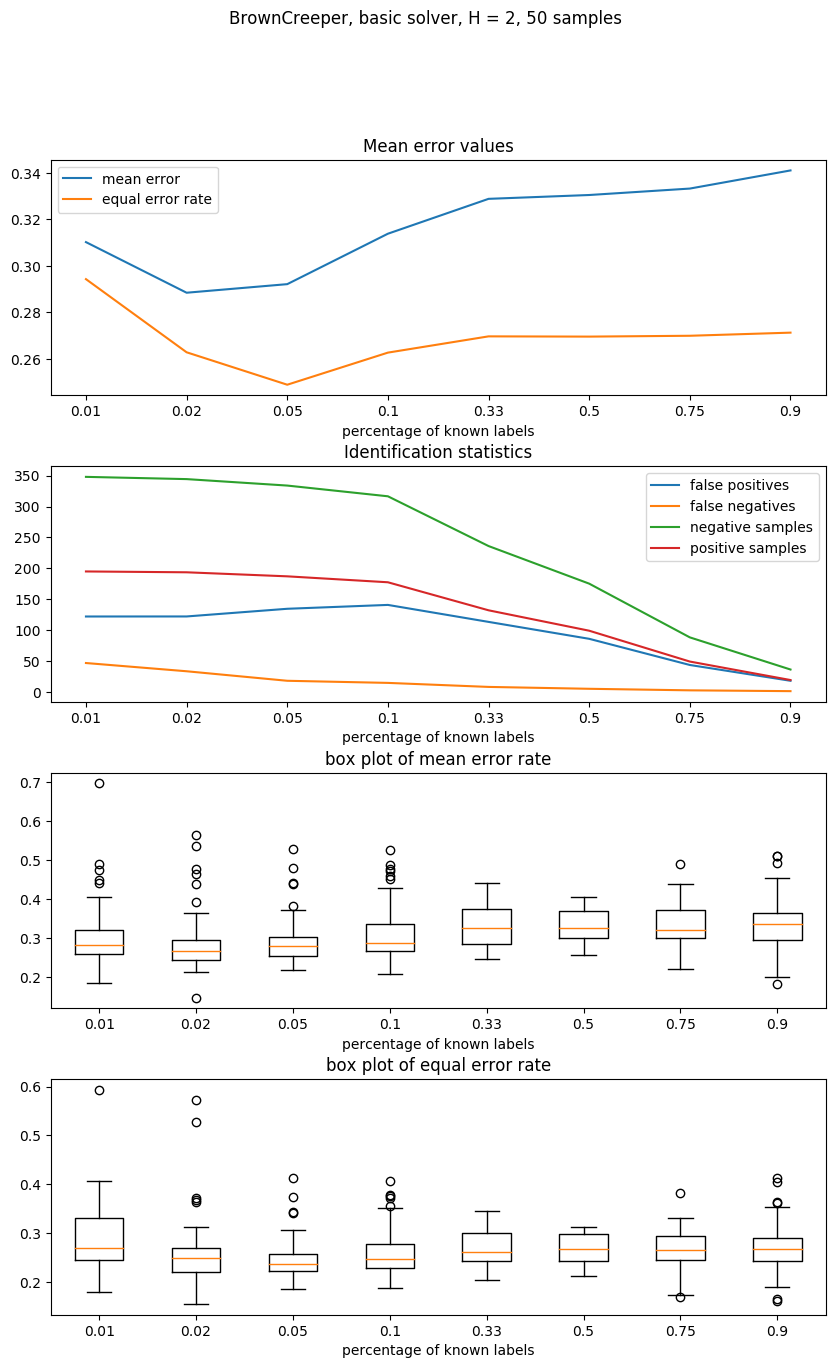

In [254]:
ind = 1
save_path = "/home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/plots"
plot_statistics(load(string(pathb250, "/", filesb250[ind])), verb = true, save_path = save_path);


Mean classsification error, sparse solver, dataset BrownCreeper, H = 2, 10 samples: 
 
 perc. of known labels | error rate | EER | false pos. | false neg. | neg. samples | pos. samples 
------------------------------------------------------------------------------------------------------
        0.01                0.289    0.270     117.6       39.3          347.9         195.1 
        0.02                0.348    0.305     157.3       30.0          344.4         193.6 
        0.05                0.265    0.241     108.9       29.2          334.4         186.6 
        0.10                0.278    0.237     121.2       16.2          317.1         176.9 
        0.33                0.336    0.273     115.9       7.7          237.7         130.3 
        0.50                0.337    0.274     87.1       5.2          176.3         97.7 
        0.75                0.337    0.273     44.3       1.9          87.0         50.0 
        0.90                0.369    0.305     19.3       1.

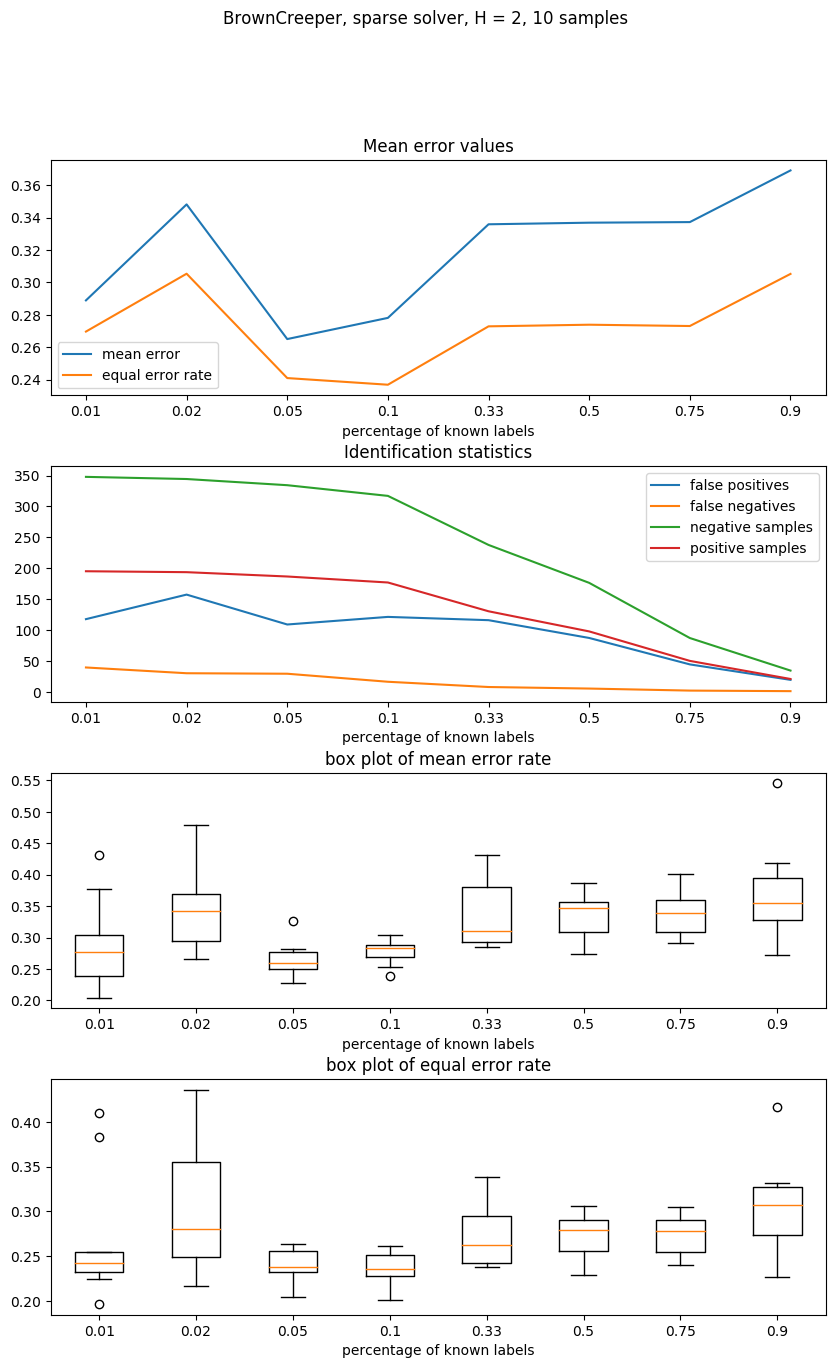

Saving the figure to /home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/plots/BrownCreeper_sparse_2_10.eps.


In [255]:
plot_statistics(load(string(paths210, "/", filess210[ind])), verb = true, save_path = save_path);


Mean classsification error, sparse solver, dataset BrownCreeper, H = 1, 50 samples: 
 
 perc. of known labels | error rate | EER | false pos. | false neg. | neg. samples | pos. samples 
------------------------------------------------------------------------------------------------------
        0.01                0.340    0.339     118.3       66.1          347.9         195.1 
        0.02                0.337    0.330     122.4       59.0          344.6         193.4 
        0.05                0.351    0.322     142.7       40.2          333.5         187.5 
        0.10                0.342    0.292     149.2       19.7          316.3         177.7 
        0.33                0.362    0.299     122.9       10.4          236.5         131.5 
        0.50                0.366    0.302     93.1       7.3          175.4         98.6 
        0.75                0.370    0.302     47.8       2.8          87.4         49.6 
        0.90                0.372    0.303     19.1       1

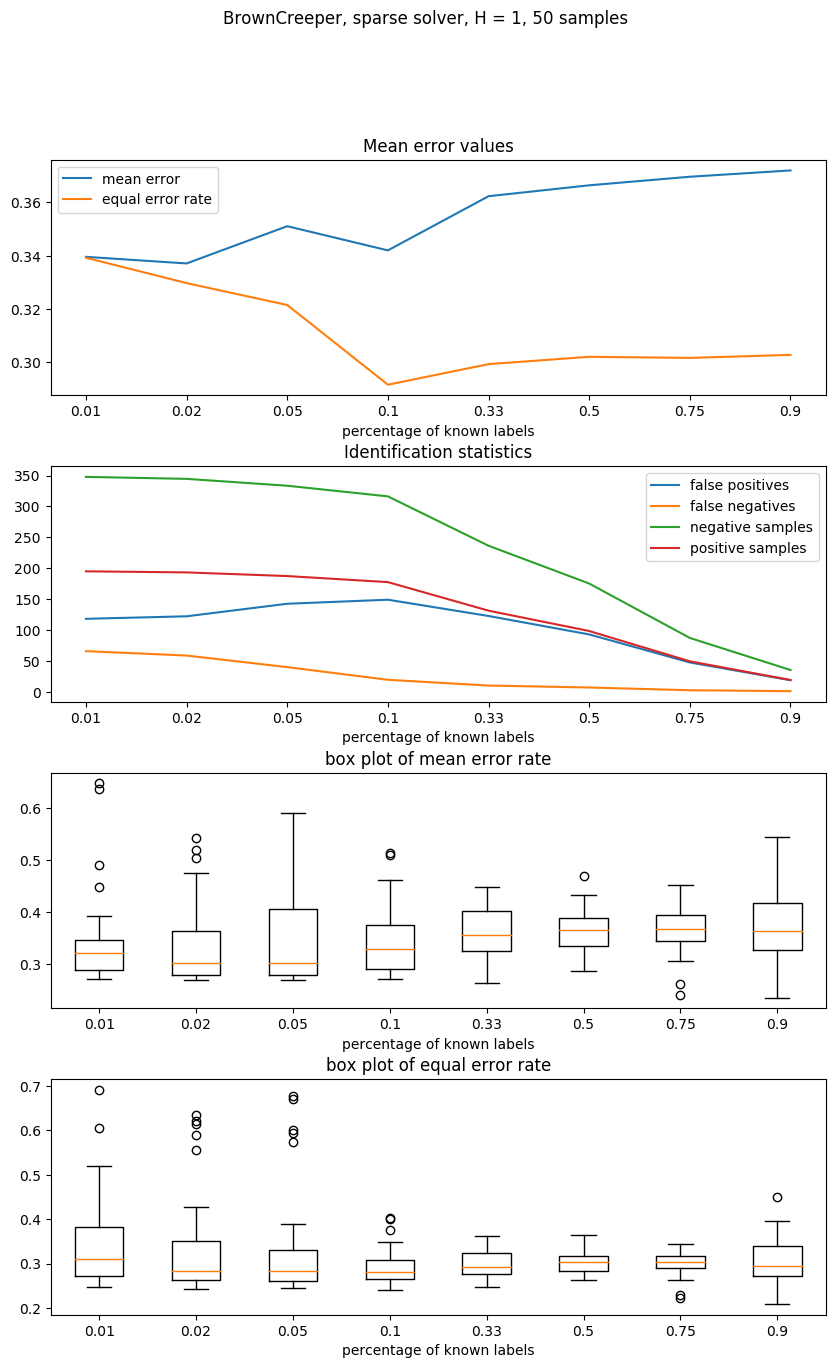

Saving the figure to /home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/plots/BrownCreeper_sparse_1_50.eps.


In [256]:
plot_statistics(load(string(paths150, "/", filess150[ind])), verb = true, save_path = save_path);


Mean classsification error, basic solver, dataset BrownCreeper, H = 1, 50 samples: 
 
 perc. of known labels | error rate | EER | false pos. | false neg. | neg. samples | pos. samples 
------------------------------------------------------------------------------------------------------
        0.01                0.351    0.342     130.0       60.4          348.0         195.0 
        0.02                0.314    0.303     117.8       51.0          344.9         193.1 
        0.05                0.350    0.309     151.1       31.0          333.3         187.7 
        0.10                0.351    0.303     150.0       23.6          316.2         177.8 
        0.33                0.353    0.294     119.0       10.9          235.7         132.3 
        0.50                0.371    0.307     94.7       7.1          174.9         99.1 
        0.75                0.368    0.300     47.2       3.2          88.3         48.7 
        0.90                0.359    0.297     18.4       1.

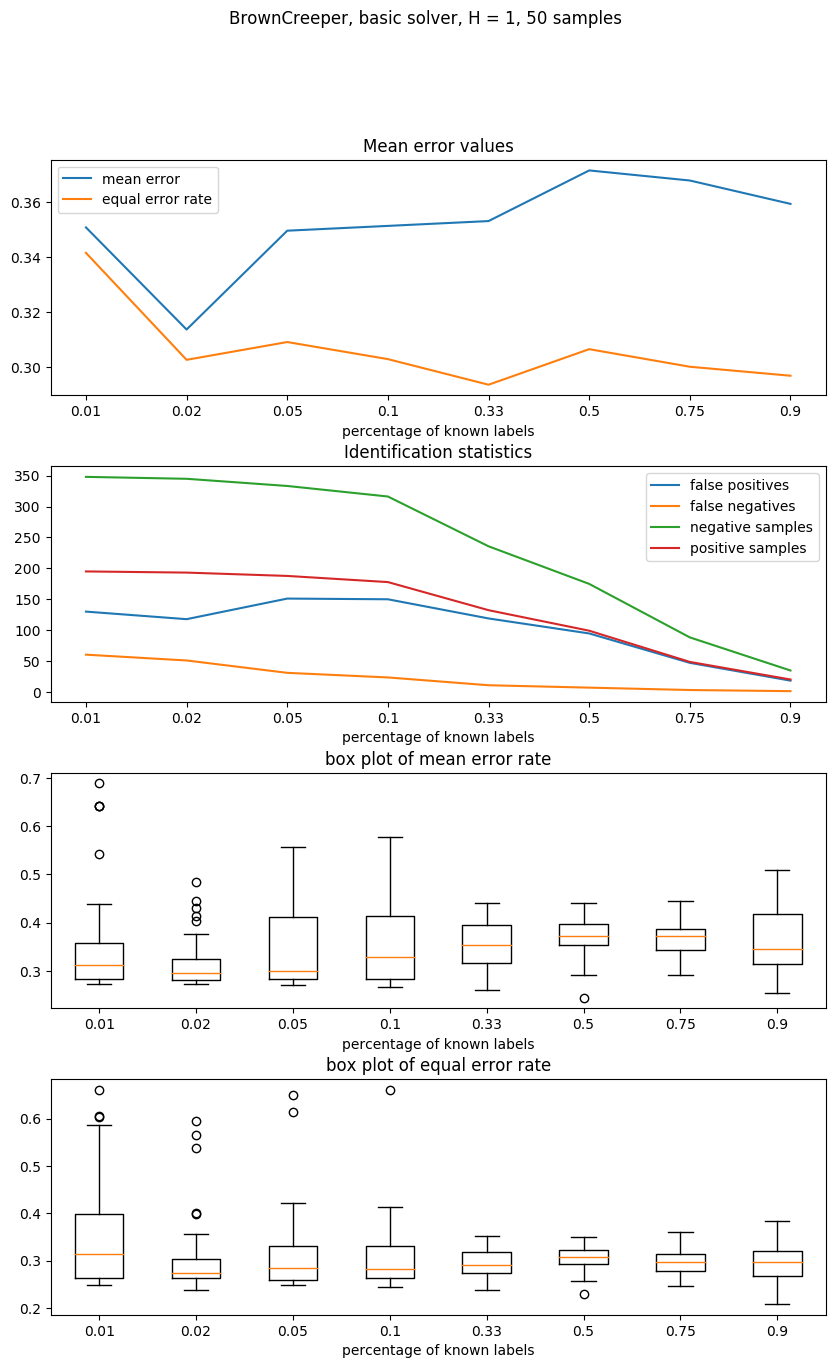

Saving the figure to /home/vit/Dropbox/vyzkum/cisco/data/vbmf_classification/plots/BrownCreeper_basic_1_50.eps.


In [257]:
plot_statistics(load(string(pathb150, "/", filesb150[ind])), verb = true, save_path = save_path);